In [ ]:
# customary imports:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import glob
import os
import tqdm
from sklearn.model_selection import StratifiedKFold

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## Load Test Data

In [ ]:
def load_normalize(image_path, normalized=True):
    image = Image.open(image_path).resize([128,128])
    image= np.array(image).astype(np.float32)
    if len(image.shape) == 3:
        image = image.sum(axis=2)
    if normalized:
        return image / 255.0
    else:
        return image

In [ ]:
# code to load all the data, assuming dataset is at /workspaces/awesome-ml-group/00_source_data/images/train
emo_types = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
emo_inds = np.arange(0, len(emo_types))

In [ ]:
# code to load all the data, assuming dataset is at /workspaces/awesome-ml-group/00_source_data/images/train
x_test = []
y_test = []

for emo_ind in emo_inds:
    all_images = glob.glob(os.path.join('/content/gdrive/MyDrive/Expression Dataset/Validation_Relabeled_Cleaned', emo_types[emo_ind],'*.jpg'))
    # x_data += [load_extract_normalize(image_path) for image_path in all_images]
    x_test += [load_normalize(image_path) for image_path in all_images]
    y_test += [emo_ind]*len(all_images)

In [ ]:
# adding a fake color channel
x_test = np.array(x_test).reshape(-1, 128, 128, 1)
y_test = np.array(y_test)
y_test_ohc = np.eye(len(emo_types))[y_test]
print(x_test.shape, y_test.shape)

(6488, 128, 128, 1) (6488,)


In [ ]:
# trying to save some memory for unnecessary variables
del all_images

## Normalization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def normalization(image):
    return image.astype(np.float32) / 255.0

In [ ]:
# import dlib
# import cv2
from numpy import load

## Forehead

In [ ]:
x_data_forehead = load('/content/gdrive/MyDrive/Expression Dataset/x_data_forehead_masked.npy')
y_data_forehead = load('/content/gdrive/MyDrive/Expression Dataset/y_data_forehead_masked.npy')

## Eyes and Eyebrows

In [ ]:
x_data_eyes = load('/content/gdrive/MyDrive/Expression Dataset/x_data_eye_eybrow_area_masked.npy')
y_data_eyes = load('/content/gdrive/MyDrive/Expression Dataset/y_data_eye_eyebrow_masked.npy')

## Lower Face Mask

In [ ]:
#/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/x_data_bottom_masked.npy
x_data_bottom = load('/content/gdrive/MyDrive/Expression Dataset/x_data_bottom_masked.npy')
y_data_bottom = load('/content/gdrive/MyDrive/Expression Dataset/y_data_forehead_masked.npy')

## Original X data

In [ ]:
x_data = load('/content/gdrive/MyDrive/Expression Dataset/x_data.npy')
y_data = load('/content/gdrive/MyDrive/Expression Dataset/y_data.npy')

In [ ]:
x_train = np.concatenate((x_data_forehead, x_data_eyes), axis=0)
x_train = np.concatenate((x_train, x_data_bottom), axis=0)
x_train = np.concatenate((x_train, x_data), axis=0)
x_train.shape

(110184, 128, 128)

In [ ]:
y_train = np.concatenate((y_data_forehead, y_data_eyes), axis=0)
y_train = np.concatenate((y_train, y_data_bottom), axis=0)
y_train = np.concatenate((y_train, y_data), axis=0)
y_train.shape

(110184,)

happy


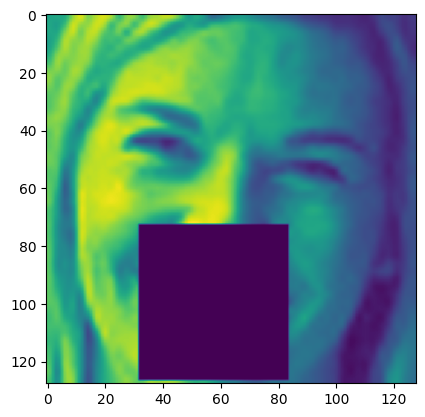

neutral


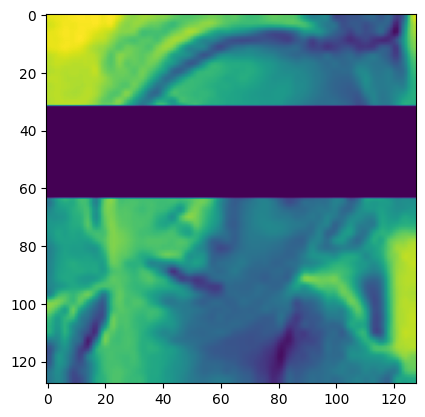

happy


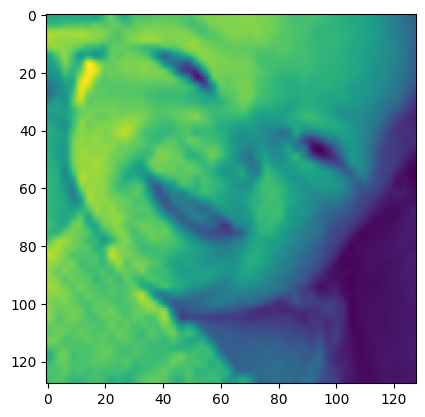

neutral


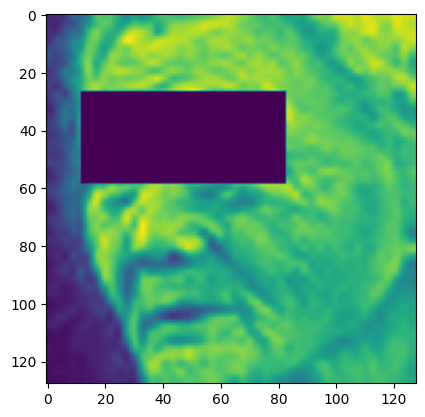

angry


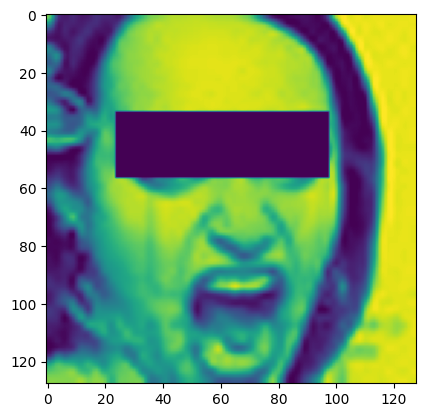

fear


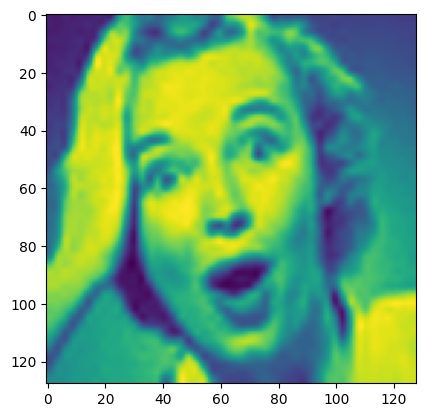

happy


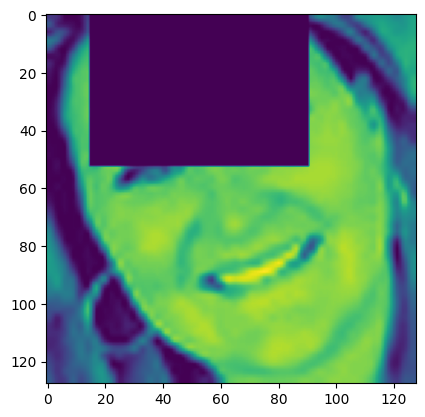

happy


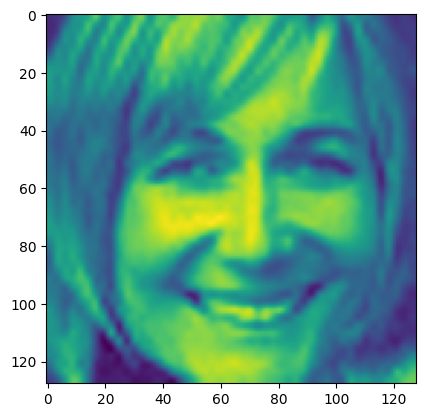

surprise


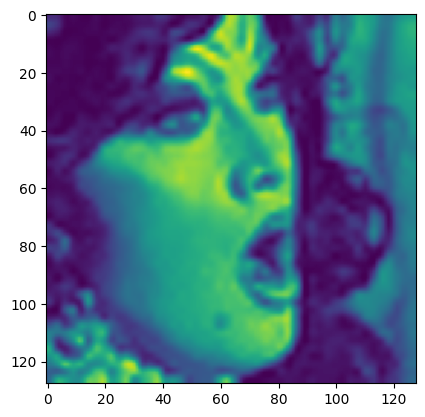

angry


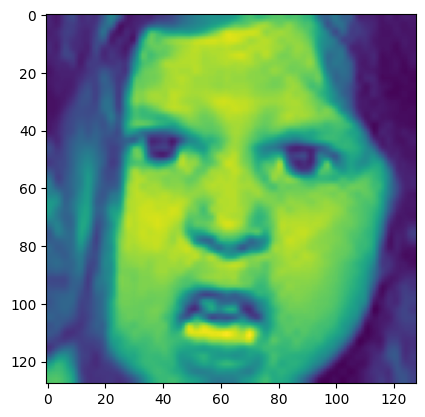

In [ ]:
for i in np.random.randint(110184, size = 10):
    img = x_train[i]
    print(emo_types[y_train[i]])
    plt.imshow(img)
    plt.show()

In [ ]:
x_train = [normalization(img) for img in x_train]

In [ ]:
# # trying to save some memory for unnecessary variables
del x_data_forehead 
del x_data_eyes 
del x_data_bottom 
del x_data

(110184, 128, 128, 1) (110184,)


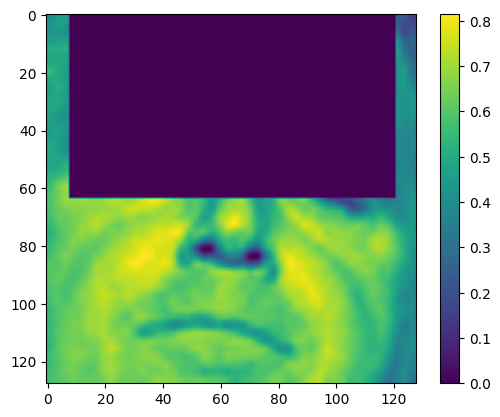

In [ ]:
# adding a fake color channel
x_train = np.array(x_train).reshape(-1, 128, 128, 1)
y_train = np.array(y_train)
y_train_ohc = np.eye(len(emo_types))[y_train]


print(x_train.shape, y_train.shape)
plt.imshow(x_train[0,:,:,0])
plt.colorbar()

In [ ]:
# trying to save some memory for unnecessary variables
del y_data_forehead 
del y_data_eyes 
del y_data_bottom 
del y_data

In [ ]:
VGG16_model_bn_full = tf.keras.models.Sequential([
    
    # Input layer
    tf.keras.layers.Input(x_train[0].shape),

    # convolutional layer with batch normalisation:
    tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Max pooling layer:
    tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

    # convolutional layer with batch normalisation:
    tf.keras.layers.Conv2D(filters=128,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Max pooling layer:
    tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

    # convolutional layer with batch normalisation:
    tf.keras.layers.Conv2D(filters=256,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Max pooling layer:
    tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

    # convolutional layer with batch normalisation:
    tf.keras.layers.Conv2D(filters=512,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=512,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Max pooling layer:
    tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

    # convolutional layer with batch normalisation:
    tf.keras.layers.Conv2D(filters=512,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=512,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Max pooling layer:
    tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

    # dense layer:
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    # Batch Normalisation layer:
    tf.keras.layers.BatchNormalization(),


    # output layer:
    tf.keras.layers.Dense(7, activation='softmax')
])

In [ ]:
VGG16_model_bn_full.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 5e-4),  # pick an optimizer and learning rate
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=tf.keras.metrics.CategoricalAccuracy())  # pick a metric to monitor

In [ ]:
n_epoch = 30
checkpoint_path = "/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True),
            tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)]
hist = VGG16_model_bn_full.fit(x_train, y_train_ohc,
                               workers=10, 
                               epochs=n_epoch,
                               batch_size=32,
                               validation_data=(x_test, y_test_ohc),
                               callbacks=callback)

Epoch 1/30
1493/3444 [============>.................] - ETA: 1:19:05 - loss: 1.9603 - categorical_accuracy: 0.2350

In [ ]:
n_epoch = 17
plt.figure(figsize=(15, 5), dpi=80)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(np.arange(n_epoch),hist.history.get('categorical_accuracy'), label="Train")
plt.plot(np.arange(n_epoch),hist.history.get('val_categorical_accuracy'), label="Test")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.title("Training & Validation Accuracy, learning rate = 0.0001")

plt.subplot(1, 2, 2) # index 2
plt.plot(np.arange(n_epoch),hist.history.get('loss'), label="Train")
plt.plot(np.arange(n_epoch),hist.history.get('val_loss'), label="Test")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend(loc='best')
plt.title("Training & Validation Loss, learning rate = 0.0001")
plt.show()

In [ ]:
# replace with your own directory
VGG16_model_bn_full.save_weights('/content/gdrive/MyDrive/ML Final project/VGG16_model_bn_full')

## Test Data

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

In [ ]:
# Evaluate the model
# loss, acc = VGG16_model_bn_forehead.evaluate(x_test, y_test, verbose=2)
# print("VGG 16 model, accuracy: {:5.2f}%".format(100 * acc))
y_pred = VGG16_model_bn_full.predict(x_test, verbose=2)

203/203 - 8s - 8s/epoch - 38ms/step


In [ ]:
y_pred = np.argmax(y_pred,axis = 1)
print(classification_report(y_test,y_pred,digits = 5))
matrix = confusion_matrix(y_test, y_pred)
# accuracies per class
print(matrix.diagonal()/matrix.sum(axis=1))

              precision    recall  f1-score   support

           0    0.43066   0.62950   0.51144       888
           1    0.77778   0.08434   0.15217        83
           2    0.40942   0.31332   0.35498       916
           3    0.80259   0.77740   0.78979      1752
           4    0.52475   0.58340   0.55253      1181
           5    0.47213   0.41268   0.44041      1088
           6    0.69557   0.62241   0.65696       580

    accuracy                        0.57244      6488
   macro avg    0.58756   0.48901   0.49404      6488
weighted avg    0.58030   0.57244   0.56850      6488

[0.6295045  0.08433735 0.31331878 0.77739726 0.5834039  0.41268382
 0.62241379]
